<a href="https://colab.research.google.com/github/NilabhOhol-Risk/GoogleColab/blob/gansTest/GANs_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
    from google.colab import drive
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: using Google CoLab
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [25]:
CMD = "wget https://raw.githubusercontent.com/Diyago/"\
  "GAN-for-tabular-data/master/requirements.txt"

!{CMD}
!pip install -r requirements.txt
!pip install tabgan

--2022-10-13 00:49:21--  https://raw.githubusercontent.com/Diyago/GAN-for-tabular-data/master/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     184  --.-KB/s    in 0s      

2022-10-13 00:49:21 (9.94 MB/s) - ‘requirements.txt’ saved [184/184]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.1 MB 460 kB/s 
     |████████████████████████████████| 100 kB 10.8 MB/s 
ERROR: Could not find a version that satisfies the requirement numpy==1.22.0 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics


In [4]:
df = pd.read_csv('fraud_applications_gans2.csv')

In [5]:
df.shape

(294905, 47)

In [6]:
df2 = df.fillna(-1)

In [7]:
df2.columns

Index(['application_id', 'sif_ind', 'pobox_exists', 'age_on_application_date',
       'is_not_within_us_mainland', 'num_matchPhone', 'num_emailMismatch',
       'num_matchEmail', 'num_IdTheftEmail', 'num_deepweb', 'num_darkweb',
       'num_mediumRiskProp', 'number_of_authorized_users',
       'number_of_terminated_users', 'id_not_confirmed_ind',
       'ssn_not_verified_ind', 'auth_user_vel_ind', 'shared_ssn_ind',
       'shared_address_ind', 'inquiry_ind', 'identity_not_confirmed_ind_1',
       'identity_not_confirmed_ind_2', 'final_assessment_level',
       'address__is_commercial', 'email__age_months',
       'email__number_of_sources', 'phone__age_months', 'phone__is_commercial',
       'phone__is_valid', 'phone__number_of_owners',
       'phone__number_of_sources', 'disconnectivity__address___email',
       'disconnectivity__address___name', 'disconnectivity__address___phone',
       'disconnectivity__email___name', 'disconnectivity__email___phone',
       'email_is_commercial', 

In [7]:
# df2.set_index('application_id',inplace=True)

In [8]:
cols_used = ['pobox_exists', 'age_on_application_date',
       'is_not_within_us_mainland', 'num_matchPhone', 'num_emailMismatch',
       'num_matchEmail', 'num_IdTheftEmail', 'num_deepweb', 'num_darkweb',
       'num_mediumRiskProp', 'number_of_authorized_users',
       'number_of_terminated_users', 'id_not_confirmed_ind',
       'ssn_not_verified_ind', 'auth_user_vel_ind', 'shared_ssn_ind',
       'shared_address_ind', 'inquiry_ind', 'identity_not_confirmed_ind_1',
       'identity_not_confirmed_ind_2', 'final_assessment_level',
       'address__is_commercial', 'email__age_months',
       'email__number_of_sources', 'phone__age_months', 'phone__is_commercial',
       'phone__is_valid', 'phone__number_of_owners',
       'phone__number_of_sources', 'disconnectivity__address___email',
       'disconnectivity__address___name', 'disconnectivity__address___phone',
       'disconnectivity__email___name', 'disconnectivity__email___phone',
       'email_is_commercial', 'email_is_disposable', 'email_is_other',
       'phone_is_landline', 'phone_is_voip', 'email__score_adj',
       'phone__score_adj', 'score_adj','sofi_fraud_sif']
cols_train = ['pobox_exists', 'age_on_application_date',
       'is_not_within_us_mainland', 'num_matchPhone', 'num_emailMismatch',
       'num_matchEmail', 'num_IdTheftEmail', 'num_deepweb', 'num_darkweb',
       'num_mediumRiskProp', 'number_of_authorized_users',
       'number_of_terminated_users', 'id_not_confirmed_ind',
       'ssn_not_verified_ind', 'auth_user_vel_ind', 'shared_ssn_ind',
       'shared_address_ind', 'inquiry_ind', 'identity_not_confirmed_ind_1',
       'identity_not_confirmed_ind_2', 'final_assessment_level',
       'address__is_commercial', 'email__age_months',
       'email__number_of_sources', 'phone__age_months', 'phone__is_commercial',
       'phone__is_valid', 'phone__number_of_owners',
       'phone__number_of_sources', 'disconnectivity__address___email',
       'disconnectivity__address___name', 'disconnectivity__address___phone',
       'disconnectivity__email___name', 'disconnectivity__email___phone',
       'email_is_commercial', 'email_is_disposable', 'email_is_other',
       'phone_is_landline', 'phone_is_voip', 'email__score_adj',
       'phone__score_adj', 'score_adj']

In [9]:
df2 = df2[cols_used]

In [10]:
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(
    df2.drop("sofi_fraud_sif", axis=1),
    df2["sofi_fraud_sif"],
    test_size=0.20,
    #shuffle=False,
    random_state=42,
)

In [11]:
df_x_train.shape

(235924, 42)

In [12]:
# Create dataframe versions for tabular GAN
df_x_test, df_y_test = df_x_test.reset_index(drop=True), \
  df_y_test.reset_index(drop=True)
df_y_train = pd.DataFrame(df_y_train)
df_y_test = pd.DataFrame(df_y_test)

In [13]:
# Pandas to Numpy
x_train = df_x_train.values
x_test = df_x_test.values
y_train = df_y_train.values
y_test = df_y_test.values

In [14]:
x_train = np.asarray(x_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')

In [15]:
# Build the neural network
model = Sequential()
# Hidden 1
model.add(Dense(50, input_dim=x_train.shape[1], activation='relu')) 
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(12, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=5, verbose=1, mode='auto',
        restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor], verbose=2,epochs=1000)

Epoch 1/1000
7373/7373 - 19s - loss: 26.5136 - val_loss: 0.6153 - 19s/epoch - 3ms/step
Epoch 2/1000
7373/7373 - 16s - loss: 0.4792 - val_loss: 0.1756 - 16s/epoch - 2ms/step
Epoch 3/1000
7373/7373 - 16s - loss: 0.1366 - val_loss: 0.0069 - 16s/epoch - 2ms/step
Epoch 4/1000
7373/7373 - 16s - loss: 0.0401 - val_loss: 0.0205 - 16s/epoch - 2ms/step
Epoch 5/1000
7373/7373 - 16s - loss: 0.0112 - val_loss: 0.0017 - 16s/epoch - 2ms/step
Epoch 6/1000
7373/7373 - 16s - loss: 0.0023 - val_loss: 9.4402e-04 - 16s/epoch - 2ms/step
Epoch 7/1000
7373/7373 - 16s - loss: 6.9151e-04 - val_loss: 7.4846e-04 - 16s/epoch - 2ms/step
Epoch 8/1000
7373/7373 - 16s - loss: 6.7159e-04 - val_loss: 7.5351e-04 - 16s/epoch - 2ms/step
Epoch 9/1000
7373/7373 - 16s - loss: 6.6961e-04 - val_loss: 7.4789e-04 - 16s/epoch - 2ms/step
Epoch 10/1000
Restoring model weights from the end of the best epoch: 5.
7373/7373 - 16s - loss: 6.6835e-04 - val_loss: 7.4921e-04 - 16s/epoch - 2ms/step
Epoch 10: early stopping


In [16]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Oct 13 00:53:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    48W / 400W |   1082MiB / 40536MiB |      8%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [17]:
pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

1844/1844 [==============================] - 2s 1ms/step
Final score (RMSE): 0.04088603495102169


In [18]:
pred

array([[0.01835016],
       [0.03096251],
       [0.02653364],
       ...,
       [0.04407172],
       [0.01046185],
       [0.01578287]], dtype=float32)

In [23]:
# !pip install scikit-learn==0.23.2

In [3]:
from tabgan.sampler import GANGenerator

In [19]:
gen_x, gen_y = GANGenerator(gen_x_times=1.1, cat_cols=None,
           bot_filter_quantile=0.001, top_filter_quantile=0.999, \
              is_post_process=True,
           adversarial_model_params={
               "metrics": "rmse", "max_depth": 2, "max_bin": 100, 
               "learning_rate": 0.02, "random_state": \
                42, "n_estimators": 500,
           }, pregeneration_frac=2, only_generated_data=False,\
           gan_params = {"batch_size": 500, "patience": 25, \
          "epochs" : 500,}).generate_data_pipe(df_x_train, df_y_train,\
          df_x_test, deep_copy=True, only_adversarial=False, \
          use_adversarial=True)

Fitting CTGAN transformers for each column:   0%|          | 0/43 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

In [23]:
gen_x

,pobox_exists,age_on_application_date,is_not_within_us_mainland,num_matchPhone,num_emailMismatch,num_matchEmail,num_IdTheftEmail,num_deepweb,num_darkweb,num_mediumRiskProp,...,disconnectivity__email___name,disconnectivity__email___phone,email_is_commercial,email_is_disposable,email_is_other,phone_is_landline,phone_is_voip,email__score_adj,phone__score_adj,score_adj
0,0,23.625578,0,7.145945,9.315449,2.099565,7.007686,6.155717,9.975358,0.494914,...,328.166981,552.040522,0,0,0,0,0,781.674577,334.174748,396.446696
1,0,54.725288,0,4.025712,4.099283,1.951082,6.634393,7.167961,1.974526,0.148772,...,98.498599,627.418442,1,0,0,0,0,704.210456,178.232972,983.553060
2,0,42.153323,0,9.036229,5.005621,-0.992918,6.304581,3.065497,9.490162,0.101298,...,997.332761,284.343101,0,0,0,0,0,342.425469,473.570329,469.431510
3,0,49.895623,0,6.226747,3.818286,3.744660,6.352137,5.328801,3.910654,0.142299,...,344.767489,548.906306,1,0,0,0,0,172.352748,783.027119,630.853168
4,0,23.756765,0,7.287935,5.010703,0.970120,7.823569,4.121590,1.021131,0.494371,...,286.281077,317.089608,0,0,1,0,0,783.175641,439.705152,969.877512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253558,0,34.000000,0,-1.000000,0.000000,10.000000,0.000000,0.000000,10.000000,0.100000,...,0.000000,0.000000,0,0,0,0,0,266.000000,413.000000,996.000000
253559,0,26.000000,0,3.000000,0.000000,7.000000,0.000000,0.000000,10.000000,0.100000,...,0.000000,0.000000,0,0,0,0,0,449.000000,461.000000,997.000000
253560,0,34.000000,0,2.000000,0.000000,8.000000,0.000000,0.000000,10.000000,0.300000,...,1000.000000,0.000000,0,0,0,0,0,204.000000,222.000000,998.000000
253561,0,48.000000,0,2.000000,0.000000,8.000000,2.000000,0.000000,10.000000,0.000000,...,0.000000,0.000000,0,0,0,0,0,255.000000,240.000000,999.000000


In [21]:
# Predict
pred = model.predict(gen_x.values)
score = np.sqrt(metrics.mean_squared_error(pred,gen_y.values))
print("Final score (RMSE): {}".format(score))

7924/7924 [==============================] - 10s 1ms/step
Final score (RMSE): 0.04068343184061442


In [25]:
gen_y.sum()

150

In [28]:
synthetic_data = pd.concat([gen_x,gen_y], axis=1)

In [34]:
# synthetic_data.to_csv('sample_gan_generated_data.csv')

In [30]:
synthetic_data.columns

Index(['pobox_exists', 'age_on_application_date', 'is_not_within_us_mainland',
       'num_matchPhone', 'num_emailMismatch', 'num_matchEmail',
       'num_IdTheftEmail', 'num_deepweb', 'num_darkweb', 'num_mediumRiskProp',
       'number_of_authorized_users', 'number_of_terminated_users',
       'id_not_confirmed_ind', 'ssn_not_verified_ind', 'auth_user_vel_ind',
       'shared_ssn_ind', 'shared_address_ind', 'inquiry_ind',
       'identity_not_confirmed_ind_1', 'identity_not_confirmed_ind_2',
       'final_assessment_level', 'address__is_commercial', 'email__age_months',
       'email__number_of_sources', 'phone__age_months', 'phone__is_commercial',
       'phone__is_valid', 'phone__number_of_owners',
       'phone__number_of_sources', 'disconnectivity__address___email',
       'disconnectivity__address___name', 'disconnectivity__address___phone',
       'disconnectivity__email___name', 'disconnectivity__email___phone',
       'email_is_commercial', 'email_is_disposable', 'email_is_oth

In [38]:
synthetic_data[synthetic_data.sofi_fraud_sif==1]

,pobox_exists,age_on_application_date,is_not_within_us_mainland,num_matchPhone,num_emailMismatch,num_matchEmail,num_IdTheftEmail,num_deepweb,num_darkweb,num_mediumRiskProp,...,disconnectivity__email___phone,email_is_commercial,email_is_disposable,email_is_other,phone_is_landline,phone_is_voip,email__score_adj,phone__score_adj,score_adj,sofi_fraud_sif
18929,0,26.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1000.0,0,0,0,1,0,357.0,881.0,985.0,1
20746,0,33.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1000.0,0,0,0,0,0,784.0,615.0,1000.0,1
24819,0,43.0,0,2.0,0.0,-1.0,-1.0,0.0,2.0,0.0,...,1000.0,0,0,0,0,0,784.0,499.0,1000.0,1
25118,0,28.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1000.0,0,0,0,0,0,784.0,512.0,1000.0,1
25351,0,29.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1000.0,0,0,0,0,0,784.0,536.0,1000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235976,0,41.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,0,0,0,0,0,784.0,-1.0,247.0,1
240340,0,59.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,0,0,0,0,0,784.0,-1.0,917.0,1
242484,0,24.0,0,-1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,-1.0,0,0,0,0,0,784.0,-1.0,919.0,1
248256,0,44.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,0,0,0,0,0,784.0,-1.0,1000.0,1


In [39]:
synthetic_data.sofi_fraud_sif.value_counts(normalize=True)

0    0.999408
1    0.000592
Name: sofi_fraud_sif, dtype: float64

In [40]:
df.sofi_fraud_sif.value_counts(normalize=True)

0    0.999318
1    0.000682
Name: sofi_fraud_sif, dtype: float64

In [41]:
!pip install table-evaluator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 285 kB 6.6 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


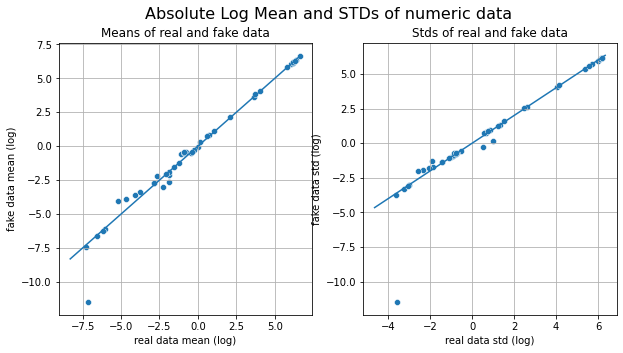

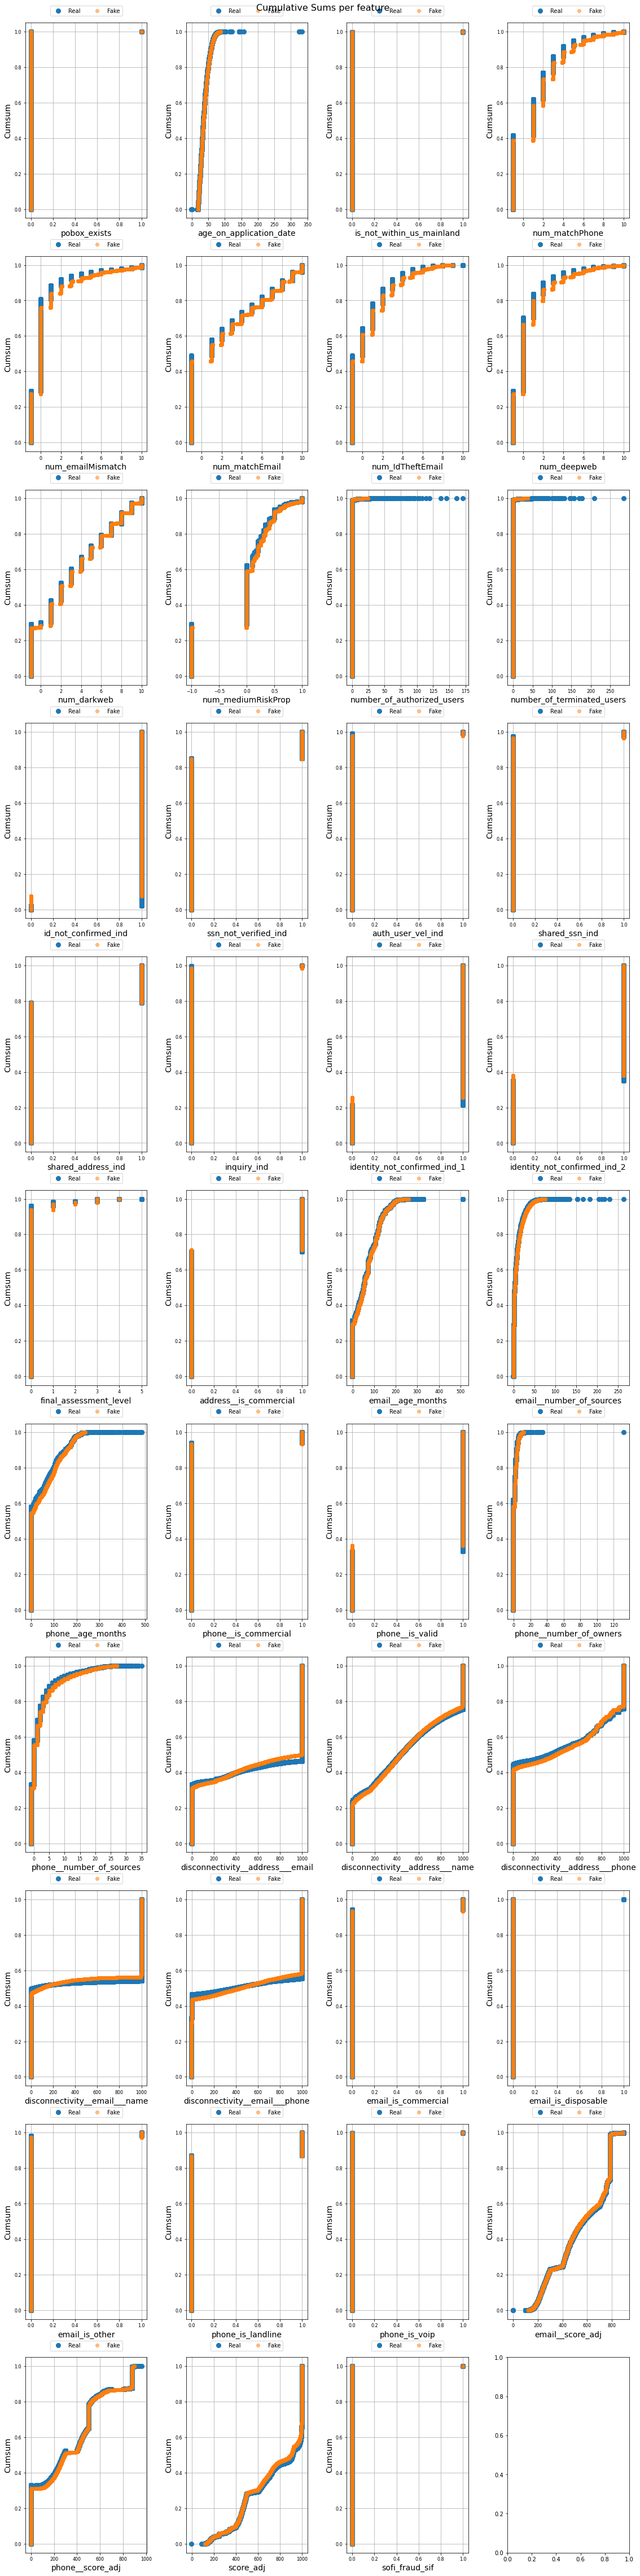

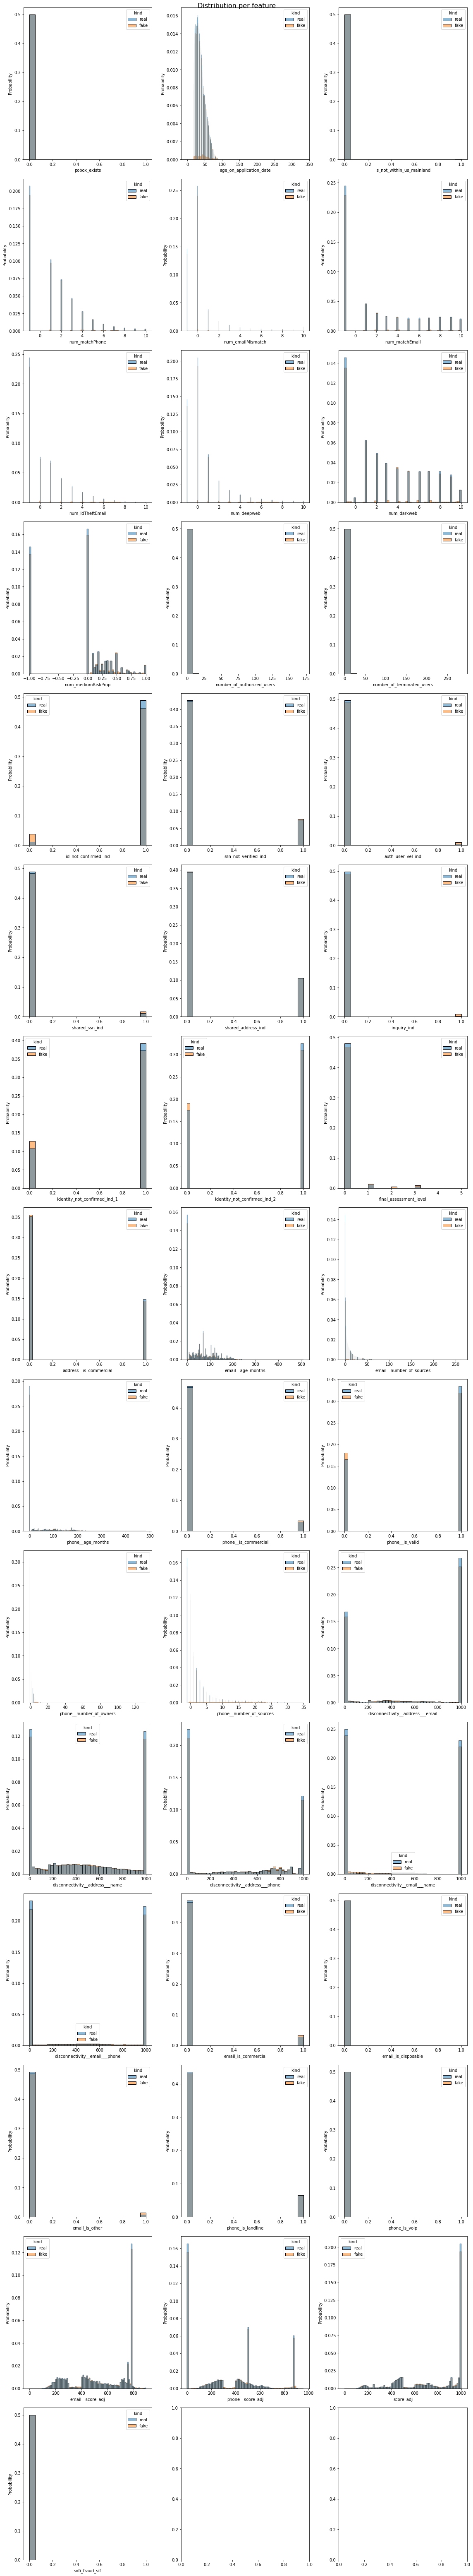

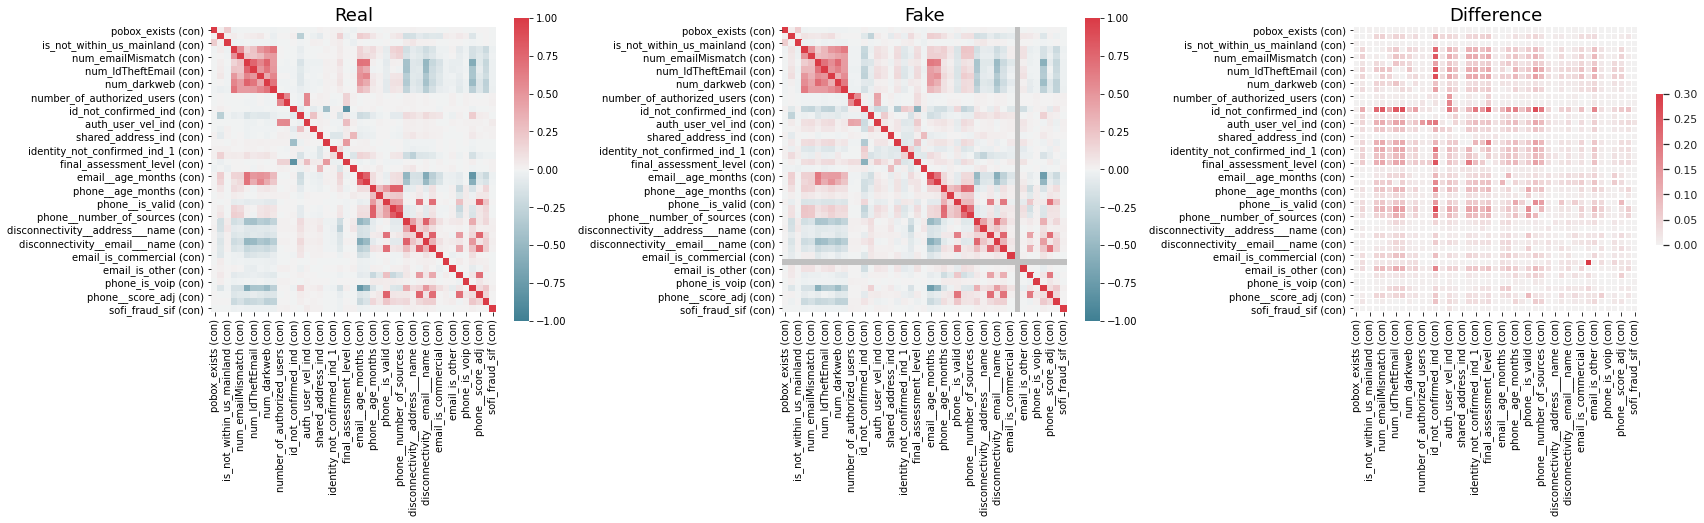

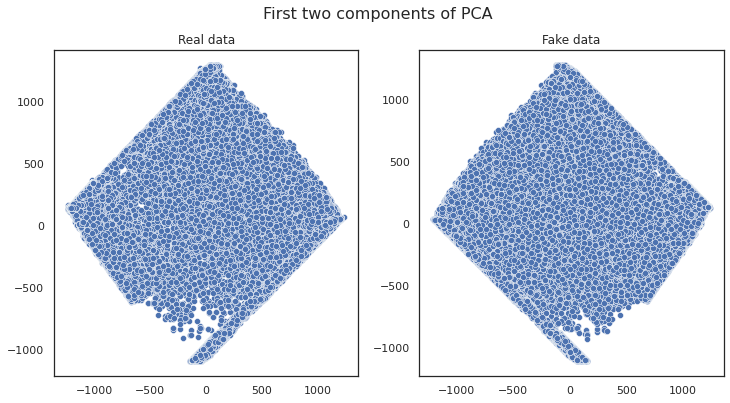

In [43]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(df2, synthetic_data)
table_evaluator.visual_evaluation()